In [33]:
%matplotlib inline

import json
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [2]:
with open('seasons.pickle') as f:
    seasons = pickle.load(f)
for year, season in seasons.iteritems():
    print year,
    season.load_scores()

2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017


In [5]:
with open('season2018.pickle') as f:
    season18 = pickle.load(f)
season18.load_scores()
seasons['2018'] = season18

In [3]:
men_goes = pd.read_csv('pd_data/goes_men.csv')
ladies_goes = pd.read_csv('pd_data/goes_ladies.csv')
pairs_goes = pd.read_csv('pd_data/goes_pairs.csv')
dance_goes = pd.read_csv('pd_data/goes_dance.csv')

/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
men_goes.tail()

,Unnamed: 0,Base Value,Bonus,Element,Final GOE,GOE,Info,Judge,Segment,Skater
369801,369801,3.0,False,CCoSp3,0.71,1.0,NaN,5.0,wc2017_men_free,Michael Christian MARTINEZ
369802,369802,3.0,False,CCoSp3,0.71,1.0,NaN,6.0,wc2017_men_free,Michael Christian MARTINEZ
369803,369803,3.0,False,CCoSp3,0.71,2.0,NaN,7.0,wc2017_men_free,Michael Christian MARTINEZ
369804,369804,3.0,False,CCoSp3,0.71,1.0,NaN,8.0,wc2017_men_free,Michael Christian MARTINEZ
369805,369805,3.0,False,CCoSp3,0.71,1.0,NaN,9.0,wc2017_men_free,Michael Christian MARTINEZ


In [7]:
goes = pd.concat([men_goes, ladies_goes, pairs_goes, dance_goes])

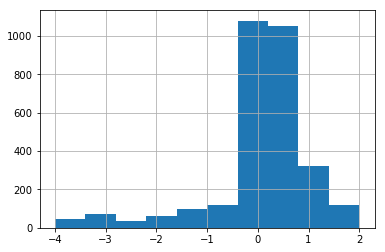

In [17]:
goes[goes.Skater == 'Alexei BYCHENKO']['Final GOE'].hist()

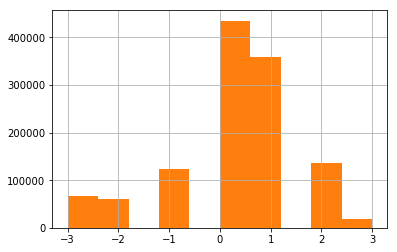

In [8]:
# All GOES.
goes.GOE.hist()
plt.show()

In [15]:
print goes.GOE.var(), goes['Final GOE'].var()

1.6628506713 0.694425268508


In [17]:
def keep_before_17(segment):
    for event in seasons['2017'].events:
        if event.name in segment:
            return False
    return True

goes_pre_16 = goes[goes.Segment.map(keep_before_17)]
print goes_pre_16.GOE.var(), goes_pre_16['Final GOE'].var()

1.61675102952 0.666168683587


In [16]:
goes_17 = goes[goes.Segment.map(lambda x: not keep_before_17(x))]
print goes_17.GOE.var(), goes_17['Final GOE'].var()

2.06364964543 0.97672942001


In [18]:
# Keep a particular year.
def keep_season(segment, year):
    for event in seasons[str(year)].events:
        if event.name in segment:
            return True
    return False

In [21]:
variances = []
for year in xrange(2006, 2018):
    goes_year = goes[goes.Segment.map(lambda segment: keep_season(segment, year))]
    print year, goes_year.GOE.var(), goes_year['Final GOE'].var()
    variances.append(goes_year.GOE.var())

2006 1.12722535466 0.473268325542
2007 1.25116463771 0.497031458055
2008 1.43811638356 0.585419191692
2009 1.42200209106 0.647430116085
2010 1.52372432023 0.729467523826
2011 1.65408567649 0.598750733279
2012 1.87439604024 0.686254765375
2013 1.82689972568 0.69632637477
2014 1.9174213858 0.7503852925
2015 1.87915781938 0.773757923478
2016 2.06108787509 0.945792099712
2017 2.06364964543 0.97672942001


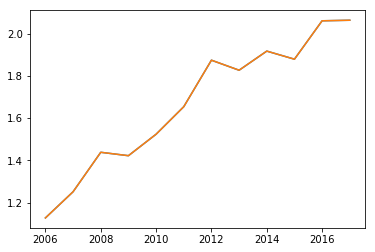

In [23]:
plt.plot(xrange(2006, 2018), variances)
plt.show()

In [106]:
elt_df_list = []
comp_df_list = []
for season in (seasons['2017'], seasons['2018']):
    for event in season.events:
        for discipline in event.disciplines:
            for segment in discipline.segments:
                for scorecard in segment.scorecards:
                    for element in scorecard.elements:
                        elt_df_list.append({
                            'skater': all_name_fixes.get(scorecard.skater.name, scorecard.skater.name),
                            'country': scorecard.skater.country,
                            'segment_name': event.name + '_' + segment.name,
                            'season': season.champ_year,
                            'discipline': discipline.discipline.name,
                            'segment_rank': scorecard.rank,
                            'start_order': scorecard.starting_number,
                            'elt_number': element.number,
                            'elt_name': element.name,
                            'elt_info': element.info,
                            'elt_bv': element.base_value,
                            'elt_bonus': element.bonus,
                            'elt_finalgoe': element.goe,
                            'elt_goes': ','.join(map(str, element.goes)),
                            'elt_points': element.points
                        })
                    for comp in scorecard.components:
                        comp_df_list.append({
                            'skater': all_name_fixes.get(scorecard.skater.name, scorecard.skater.name),
                            'country': scorecard.skater.country,
                            'segment_name': event.name + '_' + segment.name,
                            'season': season.champ_year,
                            'discipline': discipline.discipline.name,
                            'segment_rank': scorecard.rank,
                            'start_order': scorecard.starting_number,
                            'comp_name': name_fixes_components.get(comp.name, comp.name),
                            'comp_scores': ','.join(map(str, comp.scores)),
                            'comp_points': comp.points
                        })

In [107]:
elts_df = pd.DataFrame(elt_df_list)
comp_df = pd.DataFrame(comp_df_list)

In [113]:
comp_df[comp_df.segment_name == 'gpusa2016_pairs_short']

,comp_name,comp_points,comp_scores,country,discipline,season,segment_name,segment_rank,skater,start_order
210,Skating Skills,8.42,"8.5,8.0,7.75,8.75,8.5,-,8.5,8.25,9.0",RUS,pairs,2017,gpusa2016_pairs_short,1,Evgenia TARASOVA / Vladimir MOROZOV,2
211,Transitions,8.25,"8.0,8.0,7.5,8.75,8.5,-,8.5,7.75,8.75",RUS,pairs,2017,gpusa2016_pairs_short,1,Evgenia TARASOVA / Vladimir MOROZOV,2
212,Performance,8.58,"8.5,8.25,7.75,9.0,8.75,-,8.75,8.25,9.0",RUS,pairs,2017,gpusa2016_pairs_short,1,Evgenia TARASOVA / Vladimir MOROZOV,2
213,Composition,8.38,"8.0,8.0,7.5,8.75,8.75,-,8.5,8.25,9.25",RUS,pairs,2017,gpusa2016_pairs_short,1,Evgenia TARASOVA / Vladimir MOROZOV,2
214,Interpretation,8.50,"8.25,8.25,7.5,9.0,8.5,-,8.75,8.25,9.25",RUS,pairs,2017,gpusa2016_pairs_short,1,Evgenia TARASOVA / Vladimir MOROZOV,2
215,Skating Skills,7.50,"7.25,8.0,7.0,7.5,7.5,-,7.75,7.0,8.0",USA,pairs,2017,gpusa2016_pairs_short,2,Haven DENNEY / Brandon FRAZIER,6
216,Transitions,7.25,"7.0,7.75,7.25,7.0,7.0,-,7.75,7.0,7.5",USA,pairs,2017,gpusa2016_pairs_short,2,Haven DENNEY / Brandon FRAZIER,6
217,Performance,7.50,"7.5,8.0,7.25,7.25,7.5,-,8.25,7.0,7.5",USA,pairs,2017,gpusa2016_pairs_short,2,Haven DENNEY / Brandon FRAZIER,6
218,Composition,7.46,"7.25,7.75,7.5,7.0,7.25,-,8.0,7.25,7.75",USA,pairs,2017,gpusa2016_pairs_short,2,Haven DENNEY / Brandon FRAZIER,6
219,Interpretation,7.54,"7.25,8.0,7.25,7.25,7.75,-,8.0,7.25,7.75",USA,pairs,2017,gpusa2016_pairs_short,2,Haven DENNEY / Brandon FRAZIER,6
